In [1]:
import numpy as np 
import pandas as pd 
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.float_format', lambda x: '%.1f' % x)

In [2]:
daily_activity = pd.read_csv("dailyActivity_merged.csv")
sleep_day = pd.read_csv("sleepDay_merged.csv")
weight_log_info = pd.read_csv("weightLogInfo_merged.csv")

In [3]:
daily_activity

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.5,8.5,0.0,1.9,0.6,6.1,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,7.0,7.0,0.0,1.6,0.7,4.7,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.7,6.7,0.0,2.4,0.4,3.9,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.3,6.3,0.0,2.1,1.3,2.8,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.2,8.2,0.0,2.7,0.4,5.0,0.0,36,10,221,773,1863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,5/8/2016,10686,8.1,8.1,0.0,1.1,0.2,6.8,0.0,17,4,245,1174,2847
936,8877689391,5/9/2016,20226,18.2,18.2,0.0,11.1,0.8,6.2,0.1,73,19,217,1131,3710
937,8877689391,5/10/2016,10733,8.1,8.1,0.0,1.4,0.5,6.3,0.0,18,11,224,1187,2832
938,8877689391,5/11/2016,21420,19.6,19.6,0.0,13.2,0.4,5.9,0.0,88,12,213,1127,3832


In [4]:
sleep_day

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712
...,...,...,...,...,...
408,8792009665,4/30/2016 12:00:00 AM,1,343,360
409,8792009665,5/1/2016 12:00:00 AM,1,503,527
410,8792009665,5/2/2016 12:00:00 AM,1,415,423
411,8792009665,5/3/2016 12:00:00 AM,1,516,545


In [5]:
weight_log_info

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.6,116.0,22.0,22.6,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.6,116.0,NaN,22.6,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.5,294.3,NaN,47.5,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.7,125.0,NaN,21.5,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.3,126.3,NaN,21.7,True,1463097599000
...,...,...,...,...,...,...,...,...
62,8877689391,5/6/2016 6:43:35 AM,85.0,187.4,NaN,25.4,False,1462517015000
63,8877689391,5/8/2016 7:35:53 AM,85.4,188.3,NaN,25.6,False,1462692953000
64,8877689391,5/9/2016 6:39:44 AM,85.5,188.5,NaN,25.6,False,1462775984000
65,8877689391,5/11/2016 6:51:47 AM,85.4,188.3,NaN,25.6,False,1462949507000


In [6]:
dfs = {'daily_activity': daily_activity, 'sleep_day': sleep_day, 'weight_log_info': weight_log_info}

for k,v in dfs.items(): 
    print(f'{k} has \033[1m{v.shape[0]}\033[0m rows and \033[1m{v.shape[1]}\033[0m columns')

daily_activity has 940 rows and 15 columns
sleep_day has 413 rows and 5 columns
weight_log_info has 67 rows and 8 columns


In [7]:
daily_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

In [8]:
sleep_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  413 non-null    int64 
 1   SleepDay            413 non-null    object
 2   TotalSleepRecords   413 non-null    int64 
 3   TotalMinutesAsleep  413 non-null    int64 
 4   TotalTimeInBed      413 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 16.3+ KB


In [9]:
weight_log_info

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.6,116.0,22.0,22.6,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.6,116.0,NaN,22.6,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.5,294.3,NaN,47.5,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.7,125.0,NaN,21.5,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.3,126.3,NaN,21.7,True,1463097599000
...,...,...,...,...,...,...,...,...
62,8877689391,5/6/2016 6:43:35 AM,85.0,187.4,NaN,25.4,False,1462517015000
63,8877689391,5/8/2016 7:35:53 AM,85.4,188.3,NaN,25.6,False,1462692953000
64,8877689391,5/9/2016 6:39:44 AM,85.5,188.5,NaN,25.6,False,1462775984000
65,8877689391,5/11/2016 6:51:47 AM,85.4,188.3,NaN,25.6,False,1462949507000


In [10]:
weight_log_info.isnull().sum()

Id                 0
Date               0
WeightKg           0
WeightPounds       0
Fat               65
BMI                0
IsManualReport     0
LogId              0
dtype: int64

There are no missing values for all attributes except "Fat" in weight_log_info table.



In [11]:
#Check Number of Unique Participants

for k,v in dfs.items():
    print(f'{k} data has \033[1m{v.Id.nunique()}\033[0m unique Participants.' )

daily_activity data has 33 unique Participants.
sleep_day data has 24 unique Participants.
weight_log_info data has 8 unique Participants.


In [12]:
#Check Number of Total Entries

for k,v in dfs.items():
    print(f'{k} data has \033[1m{v.Id.count()}\033[0m total entries.' )

daily_activity data has 940 total entries.
sleep_day data has 413 total entries.
weight_log_info data has 67 total entries.


In [13]:
#Check Duplicates

for k, v in dfs.items():
    print(f'{k} data has \033[1m{len(v[v.duplicated()])}\033[0m duplicated rows.' )

daily_activity data has 0 duplicated rows.
sleep_day data has 3 duplicated rows.
weight_log_info data has 0 duplicated rows.


In [14]:
#Check Number of Entries by Each Unique User

#Check how many days users have been tracking data.

daily_activity.groupby('Id')['ActivityDate'].count()

Id
1503960366    31
1624580081    31
1644430081    30
1844505072    31
1927972279    31
2022484408    31
2026352035    31
2320127002    31
2347167796    18
2873212765    31
3372868164    20
3977333714    30
4020332650    31
4057192912     4
4319703577    31
4388161847    31
4445114986    31
4558609924    31
4702921684    31
5553957443    31
5577150313    30
6117666160    28
6290855005    29
6775888955    26
6962181067    31
7007744171    26
7086361926    31
8053475328    31
8253242879    19
8378563200    31
8583815059    31
8792009665    29
8877689391    31
Name: ActivityDate, dtype: int64

It is observed that User ID 4057192912 only recorded daily_activity data for 4 days.



In [15]:
sleep_day.groupby('Id')['SleepDay'].count()

Id
1503960366    25
1644430081     4
1844505072     3
1927972279     5
2026352035    28
2320127002     1
2347167796    15
3977333714    28
4020332650     8
4319703577    26
4388161847    24
4445114986    28
4558609924     5
4702921684    28
5553957443    31
5577150313    26
6117666160    18
6775888955     3
6962181067    31
7007744171     2
7086361926    24
8053475328     3
8378563200    32
8792009665    15
Name: SleepDay, dtype: int64

For sleep_day data, about 30% of participants logged data for less than 10 days.



In [16]:
weight_log_info.groupby('Id')['Date'].count()


Id
1503960366     2
1927972279     1
2873212765     2
4319703577     2
4558609924     5
5577150313     1
6962181067    30
8877689391    24
Name: Date, dtype: int64

Only 2 participants frequently logged weight data.



Data Cleaning and Data Manipulation

Remove Redundant Columns



By taking a first glance at these dataframes, it is noticed that there is some redundancy in the information provided.



In the "daily_activity" table, the values in attributes "TotalSteps" and "TrackerDistance" are identical for each user ID. Hence to make the table neater, one of the 2 columns is dropped. Attributes "LoggedActivitiesDistance" and "SedentaryActiveDistance" are giving straight 0 values and will not be used for analysis, so they are also dropped.



In the "weight_log_info" table, column "LogId" is not useful information and is hence dropped.

In [18]:
daily_activity.drop(['TrackerDistance', 'LoggedActivitiesDistance','SedentaryActiveDistance'], axis = 1, inplace = True)
weight_log_info.drop(['LogId'], axis = 1, inplace = True)


In [19]:
#Drop Duplicates

sleep_day.drop_duplicates(keep = 'first', inplace = True)
sleep_day.duplicated().sum() 

0

In [20]:
#Deal with Missing Values

weight_log_info.fillna(0, inplace = True) # Fill null values with 0.
print(weight_log_info.isnull().sum()) # Now no more null values.

Id                0
Date              0
WeightKg          0
WeightPounds      0
Fat               0
BMI               0
IsManualReport    0
dtype: int64


Column Manipulation - Rename, Create New Column

The time information in "SleepDay" column of "sleep_day" table is redundant as it is "12:00:00 AM" for all entries. Hence it is removed.


"ActivityDate" in "daily_activity" and "SleepDay" in "sleep_day" columns are renamed to be standardised.


A new column "TotalActiveMinutes" is created in "daily_activity" table.


In [21]:
# Remove "12:00:00 AM" in SleepDay column.
sleep_day['SleepDay'] = sleep_day['SleepDay'].apply(lambda x: x[:9])
sleep_day['SleepDay'].head() 

0    4/12/2016
1    4/13/2016
2    4/15/2016
3    4/16/2016
4    4/17/2016
Name: SleepDay, dtype: object

In [22]:
# Standardise "Date" column names.
daily_activity.rename(columns = {'ActivityDate': 'Date'}, inplace = True)
sleep_day.rename(columns = {'SleepDay': 'Date'}, inplace = True)


In [23]:
# Create a new column "TotalActiveMinutes" to daily_activity table.
daily_activity['TotalActiveMinutes'] = daily_activity['VeryActiveMinutes'] + daily_activity['FairlyActiveMinutes'] + daily_activity['LightlyActiveMinutes']
daily_activity['TotalActiveMinutes'].head()

0    366
1    257
2    222
3    272
4    267
Name: TotalActiveMinutes, dtype: int64

Data Transformation

Upon inspection of the data types of attributes in these dataframes, it is noticed that attribute "Date" in "daily_activity", "sleep_day" and "weight_log_info" is of object type, which shall be converted to datetime type.
All "Id" attributes in these dataframes are to be converted from int64 type to object type.



In [24]:
# Convert "Date" from object type to datetime type.
for v in dfs.values():
    v['Date'] = pd.to_datetime(v['Date'])


In [25]:
# Convert "Id" from Int64 type to object type.
for v in dfs.values():
    v['Id'] = v['Id'].astype(object)
# Check converted results
for k,v in dfs.items():
    print(f'Check {k} table \n {v.dtypes[:2]}\n')

Check daily_activity table 
 Id              object
Date    datetime64[ns]
dtype: object

Check sleep_day table 
 Id              object
Date    datetime64[ns]
dtype: object

Check weight_log_info table 
 Id              object
Date    datetime64[ns]
dtype: object



# Analyse - Gain Insights from Data

In [26]:
# Create a new column "WeekDay" to daily_activity, sleep_day and weight_log_info dataframes.
for v in dfs.values():
    v['WeekDay'] = v['Date'].dt.day_name()


In [27]:
#Retrieve current column names of daily_activity table.
daily_activity.columns.values

array(['Id', 'Date', 'TotalSteps', 'TotalDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes',
       'SedentaryMinutes', 'Calories', 'TotalActiveMinutes', 'WeekDay'],
      dtype=object)

In [28]:
#Reorder the column index in daily_activity table.
new_cols = ['Id', 'Date', 'WeekDay', 'TotalSteps', 'TotalDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes',
       'SedentaryMinutes', 'Calories', 'TotalActiveMinutes']
daily_activity = daily_activity.reindex(columns = new_cols)
daily_activity.head()

,Id,Date,WeekDay,TotalSteps,TotalDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalActiveMinutes
0,1503960366,2016-04-12,Tuesday,13162,8.5,1.9,0.6,6.1,25,13,328,728,1985,366
1,1503960366,2016-04-13,Wednesday,10735,7.0,1.6,0.7,4.7,21,19,217,776,1797,257
2,1503960366,2016-04-14,Thursday,10460,6.7,2.4,0.4,3.9,30,11,181,1218,1776,222
3,1503960366,2016-04-15,Friday,9762,6.3,2.1,1.3,2.8,29,34,209,726,1745,272
4,1503960366,2016-04-16,Saturday,12669,8.2,2.7,0.4,5.0,36,10,221,773,1863,267


In [29]:
# Merge daily_activity and sleep_day dataframes
merged_activity_sleep = pd.merge(daily_activity, sleep_day, on = ['Id', 'Date', 'WeekDay'])
merged_activity_sleep.head() # Take a look at the merged table

,Id,Date,WeekDay,TotalSteps,TotalDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalActiveMinutes,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,Tuesday,13162,8.5,1.9,0.6,6.1,25,13,328,728,1985,366,1,327,346
1,1503960366,2016-04-13,Wednesday,10735,7.0,1.6,0.7,4.7,21,19,217,776,1797,257,2,384,407
2,1503960366,2016-04-15,Friday,9762,6.3,2.1,1.3,2.8,29,34,209,726,1745,272,1,412,442
3,1503960366,2016-04-16,Saturday,12669,8.2,2.7,0.4,5.0,36,10,221,773,1863,267,2,340,367
4,1503960366,2016-04-17,Sunday,9705,6.5,3.2,0.8,2.5,38,20,164,539,1728,222,1,700,712


In [30]:
#Statistical Summary of Processed Data

daily_activity.describe()

,TotalSteps,TotalDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalActiveMinutes
count,940.0,940.0,940.0,940.0,940.0,940.0,940.0,940.0,940.0,940.0,940.0
mean,7637.9,5.5,1.5,0.6,3.3,21.2,13.6,192.8,991.2,2303.6,227.5
std,5087.2,3.9,2.7,0.9,2.0,32.8,20.0,109.2,301.3,718.2,121.8
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,3789.8,2.6,0.0,0.0,1.9,0.0,0.0,127.0,729.8,1828.5,146.8
50%,7405.5,5.2,0.2,0.2,3.4,4.0,6.0,199.0,1057.5,2134.0,247.0
75%,10727.0,7.7,2.1,0.8,4.8,32.0,19.0,264.0,1229.5,2793.2,317.2
max,36019.0,28.0,21.9,6.5,10.7,210.0,143.0,518.0,1440.0,4900.0,552.0


In [31]:
sleep_day.describe()


,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
count,410.0,410.0,410.0
mean,1.1,419.2,458.5
std,0.3,118.6,127.5
min,1.0,58.0,61.0
25%,1.0,361.0,403.8
50%,1.0,432.5,463.0
75%,1.0,490.0,526.0
max,3.0,796.0,961.0


In [33]:
weight_log_info.describe()


,WeightKg,WeightPounds,Fat,BMI
count,67.0,67.0,67.0,67.0
mean,72.0,158.8,0.7,25.2
std,13.9,30.7,4.0,3.1
min,52.6,116.0,0.0,21.5
25%,61.4,135.4,0.0,24.0
50%,62.5,137.8,0.0,24.4
75%,85.0,187.5,0.0,25.6
max,133.5,294.3,25.0,47.5


Key Statistical Findings:

1)
The BMI statistics in weight_log_info table shows that the middle 50% of the records is between 24.0 and 25.6, which covers the upperbound of a "normal" BMI range (18.5 ~ 24.9) and extends slightly into the "overweight" BMI range (25.0 ~ 29.9). This could suggest that users whose BMI is around the "normal" upperbound tend to be more active and motivated in using the smart device.

2)25% of the sleep records have total asleep minutes of 361min and less. That is about 6 hours and less.

3)Average total steps recorded is 7638 steps per day. Average calories burned per day is 2304 calories.

# Visualisations and Communicate Findings from Analysis


How Users Use the Smart Device


In [34]:
# Consider tracking data more than 10 days during the two-month period as active.
num_active_user = {'daily_activity': sum(daily_activity.groupby('Id')['Date'].count()>10),
                   'sleep_day': sum(sleep_day.groupby('Id')['Date'].count()>10), 
                   'weight_log_info': sum(weight_log_info.groupby('Id')['Date'].count()>10)}

num_inactive_user = {'daily_activity': sum(daily_activity.groupby('Id')['Date'].count()<10), 
                     'sleep_day': sum(sleep_day.groupby('Id')['Date'].count()<10), 
                     'weight_log_info': sum(weight_log_info.groupby('Id')['Date'].count()<10)}

print(num_active_user)
print(num_inactive_user)

{'daily_activity': 32, 'sleep_day': 15, 'weight_log_info': 2}
{'daily_activity': 1, 'sleep_day': 9, 'weight_log_info': 6}


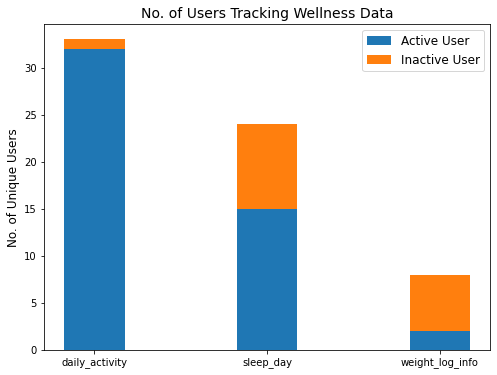

In [35]:
labels = ['daily_activity', 'sleep_day', 'weight_log_info']
active_users = [i for i in num_active_user.values()]
inactive_users = [i for i in num_inactive_user.values()]

width = 0.35       

fig, ax = plt.subplots(figsize = (8, 6))

ax.bar(labels, active_users, width, label='Active User')
ax.bar(labels, inactive_users, width, bottom= active_users,
       label='Inactive User')

ax.set_ylabel('No. of Unique Users', size = 12)
ax.set_title('No. of Users Tracking Wellness Data', size = 14)
ax.legend(fontsize = 12)

plt.show()

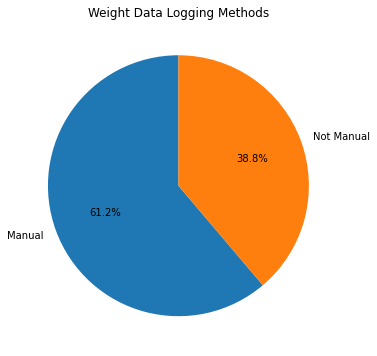

In [36]:
#A pie chart  to show composition of users manually logging weight data.

is_manual = sum(weight_log_info['IsManualReport']==True)
is_not_manual = sum(weight_log_info['IsManualReport']==False)

slices = [is_manual, is_not_manual]
labels = 'Manual', 'Not Manual'

fig1, ax1 = plt.subplots(figsize = (6,6))
plt.pie(slices, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
plt.title('Weight Data Logging Methods') 

plt.show()

This stacked bar chart titled "No. of Users Tracking Wellness Data" shows that participants use smart device much more to record daily activities than to record sleep and weight data. This could be an indication of motivation.



Users are lack of motivation to take sleep data possibly because they tend to take off the smart device before going to sleep. The company can consider improving the design of the smart device so that users feel more comfortable sleeping while wearing it. Another possible solution is to push notification to remind users to wear it before going to sleep.



As for weight data, the entries are even less. The pie chart titled "Weight Data Logging Methods" shows that 61.2% of weight data are manually input by users, which could suggest that the manual input method is discouraging users to track weight data as users tend to forget to record or consider it as too troublesome. The company can include a feature in the smart device that allows users to set schedules for taking weight data so that the device will send notification to remind users in a regular weekly or biweekly etc. basis.

In [37]:
week_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

def get_weekday_rec(data): 
    rec = {'Monday':0, 'Tuesday':0, 'Wednesday':0, 'Thursday':0, 'Friday':0, 'Saturday':0, 'Sunday':0}
    for i in rec:
        rec[i] = sum(data.WeekDay == i)
    return rec

weekday_activity = get_weekday_rec(daily_activity)
weekday_sleep = get_weekday_rec(sleep_day)
weekday_weight = get_weekday_rec(weight_log_info)



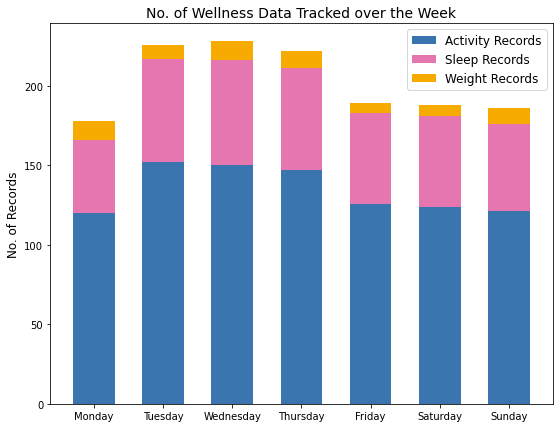

In [38]:
labels = week_order
activity_rec = [i for i in weekday_activity.values()]
sleep_rec = [i for i in weekday_sleep.values()]
weight_rec = [i for i in weekday_weight.values()]

width = 0.6      

fig, ax = plt.subplots(figsize = (9, 7))

ax.bar(labels, activity_rec, width, label='Activity Records', color = '#3b75af')
ax.bar(labels, sleep_rec, width, bottom= activity_rec,
       label='Sleep Records', color = '#E676B0')
import operator as op
ax.bar(labels, weight_rec, width, bottom= list(map(op.add,activity_rec,sleep_rec)),
       label='Weight Records', color = '#F7ab00')

ax.set_ylabel('No. of Records', size = 12)
ax.set_title('No. of Wellness Data Tracked over the Week', size = 14)
ax.legend(fontsize = 12)

plt.show()

From the stacked bar chart "No. of Wellness Data Tracked over the Week", it is observed that users are more motivated to track their activity using the smart device from Tuesday to Thursday. Usage is reduced near the weekends from Friday to Monday. Special notification can be sent on Fridays to encourage users not to lose momentum and to continue using the device over the weekends.



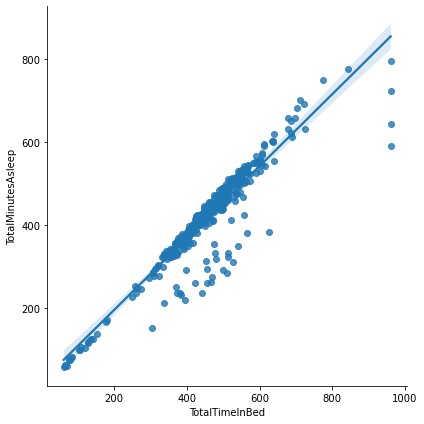

In [39]:
#Correlation between Time in Bed and Total Time Asleep
#A scatter plot to investigate the relationships between "TotalTimeInBed" and "TotalMinutesAsleep" in "sleep_day" data.

sns.lmplot(x='TotalTimeInBed', y = 'TotalMinutesAsleep', data = sleep_day, height = 6, aspect = 1)

It is observed that there is a positive linear relationship between total time asleep and total time in bed. The smart device can remind users to go to bed on time so they can have more sleep.



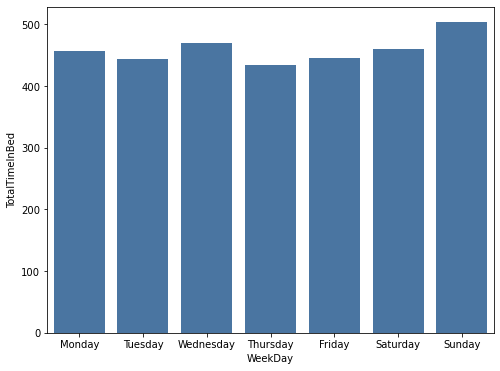

In [40]:
plt.figure(figsize = (8,6))
sns.barplot(x = 'WeekDay', y = 'TotalTimeInBed', data = merged_activity_sleep, order = week_order, color = '#3b75af', ci = None)
plt.show()

It is observed that total time in bed on Sunday is relatively higher than the rest of week days, propably because Sunday is rest day.



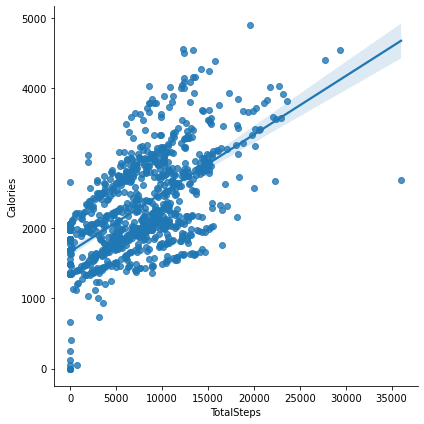

In [41]:
#Correlation between Total Steps and Calories
sns.lmplot(x='TotalSteps', y = 'Calories', data = daily_activity, height = 6)

There is a positive linear relationship between total steps and calories burned. A useful feature that could encourage users to take more steps is to display a task progress bar on the device that shows how many more steps to take to burn an estimated calories target.



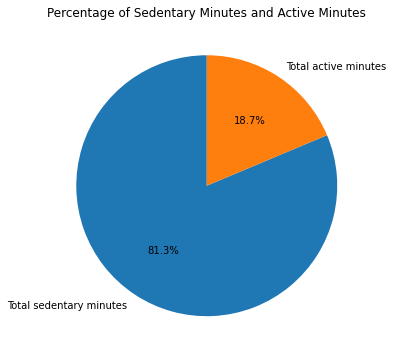

In [42]:
#Percentage of Sedentary Minutes and Active Minutes

sedentary_minutes = sum(daily_activity['SedentaryMinutes'])
active_minutes = sum(daily_activity['TotalActiveMinutes'])

slices = [sedentary_minutes, active_minutes]
labels = 'Total sedentary minutes', 'Total active minutes' 

fig1, ax1 = plt.subplots(figsize = (6,6))
plt.pie(slices, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
plt.title('Percentage of Sedentary Minutes and Active Minutes') 

plt.show()

As shown in the pie chart, 81.3% of the tracked time users are sedentary, which is not good for health. It could also suggest that majority of participants might be having desk-bound jobs which require them to be seated for a long time.



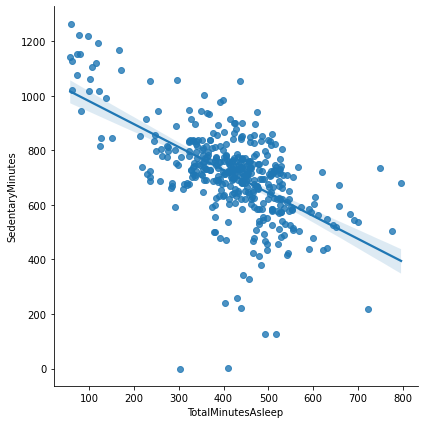

In [43]:
#Correlation between Total Time Asleep and Sedentary Minutes
sns.lmplot(x='TotalMinutesAsleep', y = 'SedentaryMinutes', data = merged_activity_sleep, height = 6)

#Negatively correlated


The scatter plot shows that total minutes asleep and sedentary minutes are inversely proportional. This could suggest that users who sleep less tend to be less active probably due to fatigue and low energy resulted from the lack of sleep.

#  Business Recommendations from Analysis


Now we look back to our business questions and make recommendations based on analysis of the Fitbit users' data.

Target Users

1. 
Bellabeat products marketing can put special focus on users whose BMI is near the "normal" range upperbound or slightly 
"overweight" as this group of users is more motivated in using the smart device for weight data tracking and management.


2.
Bellabeat marketing can highlight fitness management products to office ladies as this group of users tends to have long sedentary time due to the nature of their work and hence has the need to schedule fitness routines to maintain a healthy lifestyle.


3.
Bellabeat sleep management products can target female users working in a fast-paced and stressful environment as they have the need to monitor sleep quality to stay energetic during the day.


# Product Features



Bellabeat products can guide users to set personalised fitness goals. The smart device dashboard can display a task progress bar on steps taken and calories burned to help users understand the gap towards a certain target.


Bellabeat products can design the notification system to encourage users to continue using the products and prevent loss of motivation.


Push notification to remind users to stick to scheduled bedtime.


Remind users on Friday to continue wearing it on weekends.


Remind users if they have remained sedentary for a long time.


Improve the sleep monitoring device design to make it more comfortable wearing during sleep as Fitbit users' data have shown that users tend to take off the smart device before sleep.